### Importing the Libraries

In [23]:
import matplotlib.pyplot as plt
import os, cv2, random
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

### Reading the Training Dataset

In [24]:
directory = "./Training Dataset"
categories = ["Grape", "Raisin"]

dataset = []
for category in categories:
    folder = os.path.join(directory, category)
    label = categories.index(category)

    for name in os.listdir(folder):
        image_name = os.path.join(folder, name)
        image = cv2.imread(image_name)
        dataset.append([image, label])

random.shuffle(dataset)

x_train = []
y_train = []

for image, label in dataset:
    x_train.append(image)
    y_train.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)

### Reading the Validation Dataset

In [25]:
directory = "./Validation Dataset"
categories = ["Grape", "Raisin"]

dataset = []
for category in categories:
    folder = os.path.join(directory, category)
    label = categories.index(category)

    for name in os.listdir(folder):
        image_name = os.path.join(folder, name)
        image = cv2.imread(image_name)
        dataset.append([image, label])

random.shuffle(dataset)

x_val = []
y_val = []

for image, label in dataset:
    x_val.append(image)
    y_val.append(label)

x_val = np.array(x_val)
y_val = np.array(y_val)

### Reading the Test Dataset

In [26]:
directory = "./Test Dataset"
categories = ["Grape", "Raisin"]

dataset = []
for category in categories:
    folder = os.path.join(directory, category)
    label = categories.index(category)

    for name in os.listdir(folder):
        image_name = os.path.join(folder, name)
        image = cv2.imread(image_name)
        dataset.append([image, label])

random.shuffle(dataset)

x_test = []
y_test = []

for image, label in dataset:
    x_test.append(image)
    y_test.append(label)

x_test = np.array(x_test)
y_test = np.array(y_test)

### Function for Generating Label

In [27]:
def get_label(label):
    if not label:
        return "Grape"
    return "Raisin"

### Displaying some samples

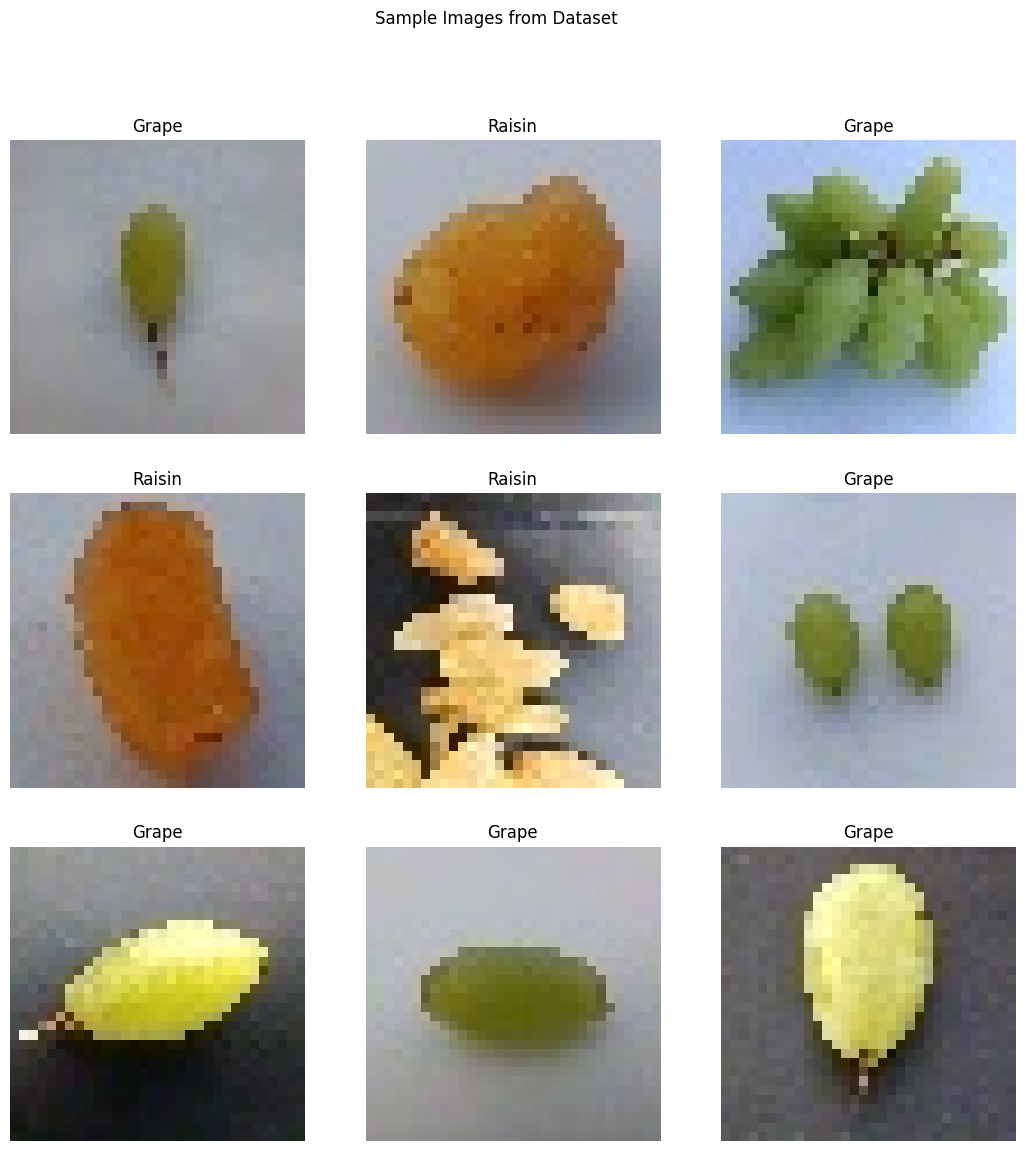

In [28]:
plt.figure(figsize = (13, 13))
for k in range(1, 10):
    plt.subplot(3, 3, k)
    plt.imshow(cv2.cvtColor(x_train[k], cv2.COLOR_BGR2RGB))
    plt.title(get_label(y_train[k]))
    plt.axis("off")

plt.suptitle("Sample Images from Dataset")
plt.show()

### Showing Training, Validation & Test Set Shape

In [29]:
print("Training set:", x_train.shape, y_train.shape)
print("Validation set:", x_val.shape, y_val.shape)
print("Test set:", x_test.shape, y_test.shape)

Training set: (1070, 32, 32, 3) (1070,)
Validation set: (260, 32, 32, 3) (260,)
Test set: (420, 32, 32, 3) (420,)


### Building a Model like the VGG16

In [30]:
vgg16_model = VGG16(weights = "imagenet", include_top = False, input_shape = (32, 32, 3))

for layer in vgg16_model.layers:
    layer.trainable = False

model = models.Sequential()
model.add(vgg16_model)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(256, activation = "relu"))
model.add(layers.Dense(128, activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = "sigmoid"))

model.compile(optimizer = Adam(0.0001), loss = "binary_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

### Model History

In [31]:
history = model.fit(x_train, y_train, epochs = 40, validation_data = (x_val, y_val))

Epoch 1/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.6618 - loss: 3.6781 - val_accuracy: 0.9115 - val_loss: 0.5259
Epoch 2/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.9115 - loss: 0.5307 - val_accuracy: 0.9115 - val_loss: 0.4735
Epoch 3/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.9301 - loss: 0.3385 - val_accuracy: 0.9577 - val_loss: 0.2456
Epoch 4/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.9441 - loss: 0.2568 - val_accuracy: 0.9500 - val_loss: 0.2015
Epoch 5/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.9663 - loss: 0.2074 - val_accuracy: 0.9615 - val_loss: 0.1469
Epoch 6/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.9792 - loss: 0.0937 - val_accuracy: 0.9385 - val_loss: 0.3229
Epoch 7/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.9822 - loss: 0.0685 - val_accuracy: 0.9577 - val_loss: 0.1620
Epoch 8/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.9879 - loss: 0.0572 - val_accuracy: 0.

### Plotting The Accuracy & Loss Graph

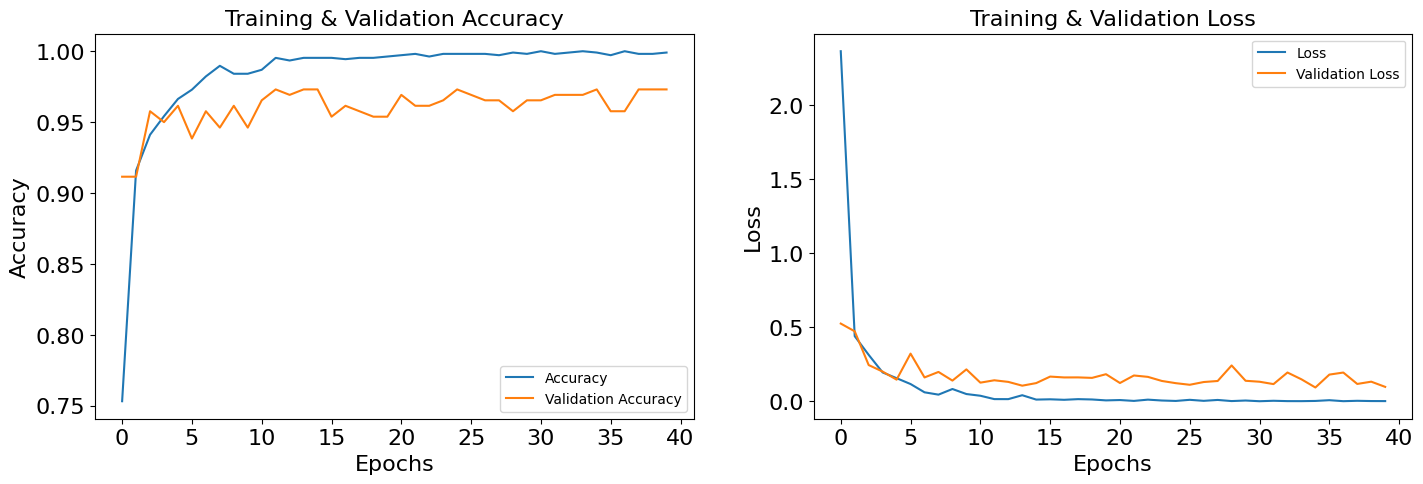

In [32]:
plt.figure(figsize = (17, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label = "Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.title("Training & Validation Accuracy", fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Epochs", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label = "Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.title("Training & Validation Loss", fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Epochs", fontsize = 16)
plt.ylabel("Loss", fontsize = 16)
plt.legend()
plt.show()

### Evaluating the Model on Test Set

In [33]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {round(test_accuracy * 100, 2)}%")

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.8810 - loss: 1.3683
Test Accuracy: 85.95%
